In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [94]:
df_netflix_final = pd.read_csv("analisis_netflix_final.csv")


In [95]:
df_netflix_final.sample(10)

,type,title,director,country,release_year,age_rating,genre,rating,stars,votes,month_added,year_added,duration_min,seasons
1382,Movie,bill hicks: relentless,Chris Bould,United Kingdom,1992,TV-MA,Stand-Up Comedy,8.5,Chris Bould,2555,12,2018,61,0
2589,Movie,kitty love: an homage to cats,Not Given,Netherlands,2021,TV-G,Children & Family Movies,5.1,Mark Verkerk,506,6,2021,61,0
3398,TV Show,the order,Not Given,United States,2020,TV-MA,International TV Shows,7.7,Kristin Lehman,425,6,2020,0,2
4518,TV Show,ashes of love,Not Given,China,2018,TV-14,International TV Shows,8.3,Zi Yang,2076,12,2018,0,1
3819,TV Show,unstoppable,Not Given,Mexico,2020,TV-MA,International TV Shows,7.2,Tessa Ia,969,2,2020,0,1
3409,TV Show,f is for family,Not Given,United States,2020,TV-MA,TV Comedies,8.1,Sylvain Lavoie,385,6,2020,0,4
335,Movie,the house of flowers: the movie,Manolo Caro,Mexico,2021,TV-MA,Comedies,5.5,Manolo Caro,875,6,2021,88,0
4430,TV Show,you vs. wild,Not Given,United States,2019,TV-PG,Kids' TV,7.1,Ben Simms,90,4,2019,0,1
3745,TV Show,freud,Not Given,Austria,2020,TV-MA,Crime TV Shows,6.5,Robert Finster,11883,3,2020,0,1
3648,TV Show,bleach,Not Given,Japan,2006,TV-14,Anime Series,7.5,Kino Abe,312,4,2020,0,5


``Visualización distribución de películas y series en plataforma``

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22608\2818429717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_netflix_final, palette='viridis')


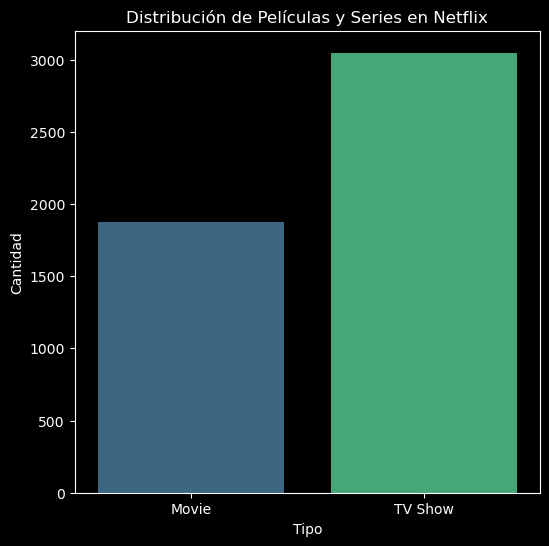

In [96]:
# Gráfico
plt.figure(figsize=(6,6))
sns.countplot(x='type', data=df_netflix_final, palette='viridis')
plt.title('Distribución de Películas y Series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

``Visualización cantidad de películas y series en catálogo por año de estreno``

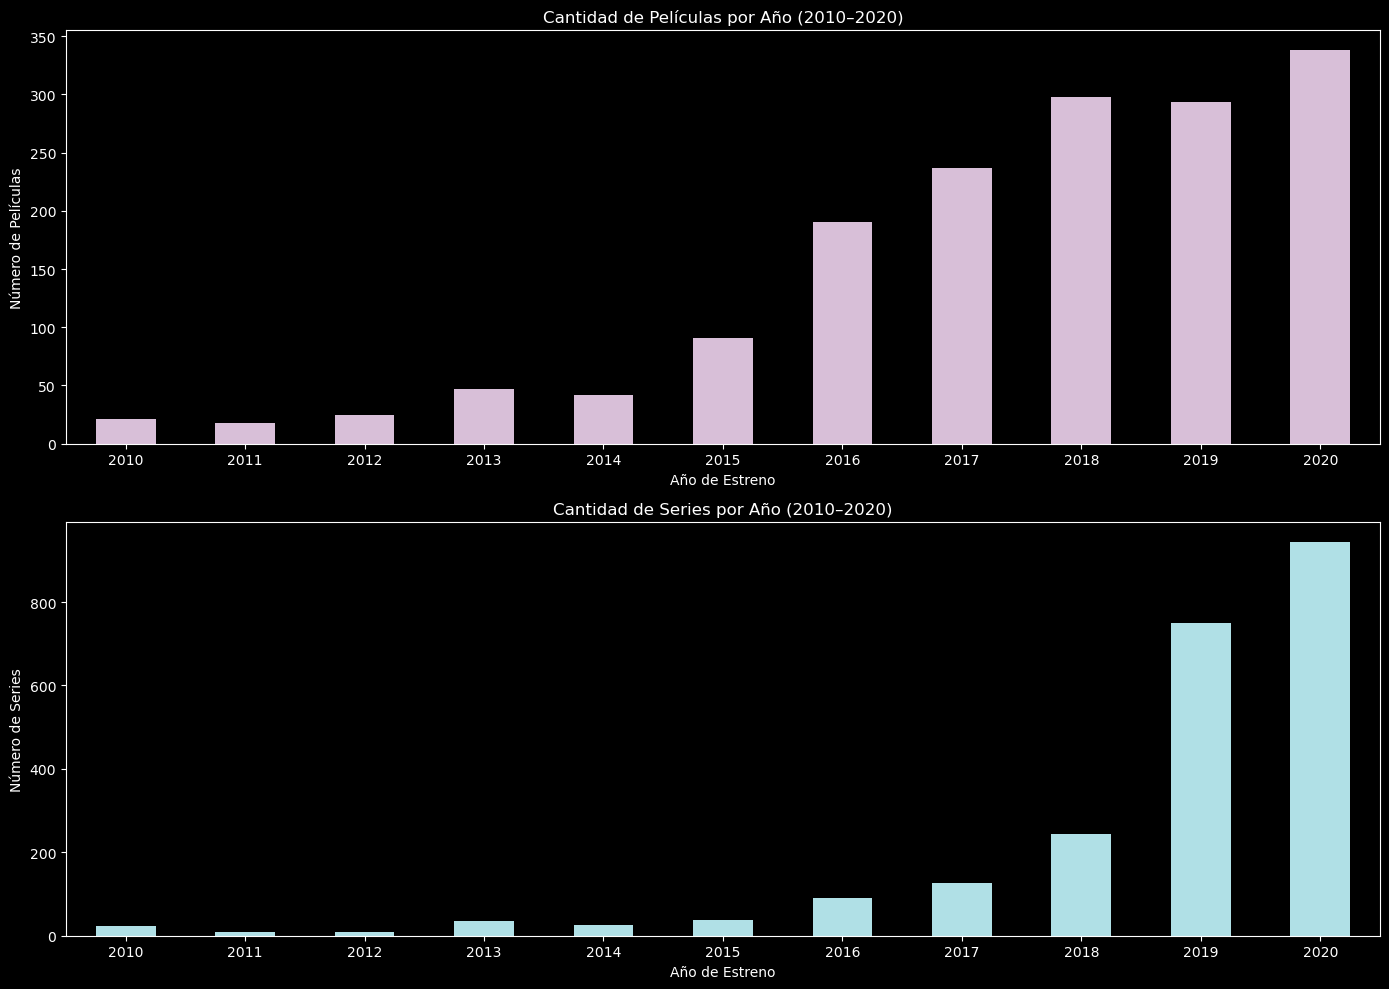

In [97]:
# Gráfico de cantidad de estrenos por año por peli y serie
# Filtramos directamente por tipo y año (pelicula y serie respectiavmente)
peliculas = df_netflix_final[
    (df_netflix_final['type'] == 'Movie') &
    (df_netflix_final['release_year'].between(2010, 2020))
]

series = df_netflix_final[
    (df_netflix_final['type'] == 'TV Show') &
    (df_netflix_final['release_year'].between(2010, 2020))
]

# Creamos los subplots
plt.figure(figsize=(14,10))

# Gráfico de películas
plt.subplot(2,1,1)
peliculas['release_year'].value_counts().sort_index().plot(kind='bar', color='thistle')
plt.title('Cantidad de Películas por Año (2010–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Películas')
plt.xticks(rotation=0)

# Gráfico de series
plt.subplot(2,1,2)
series['release_year'].value_counts().sort_index().plot(kind='bar', color='powderblue')
plt.title('Cantidad de Series por Año (2010–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Series')
plt.xticks(rotation=0)

# Ajuste de diseño
plt.tight_layout()
plt.show()

``Visualización año de estreno y cantidad de usuarios que votan tanto en películas como en series``

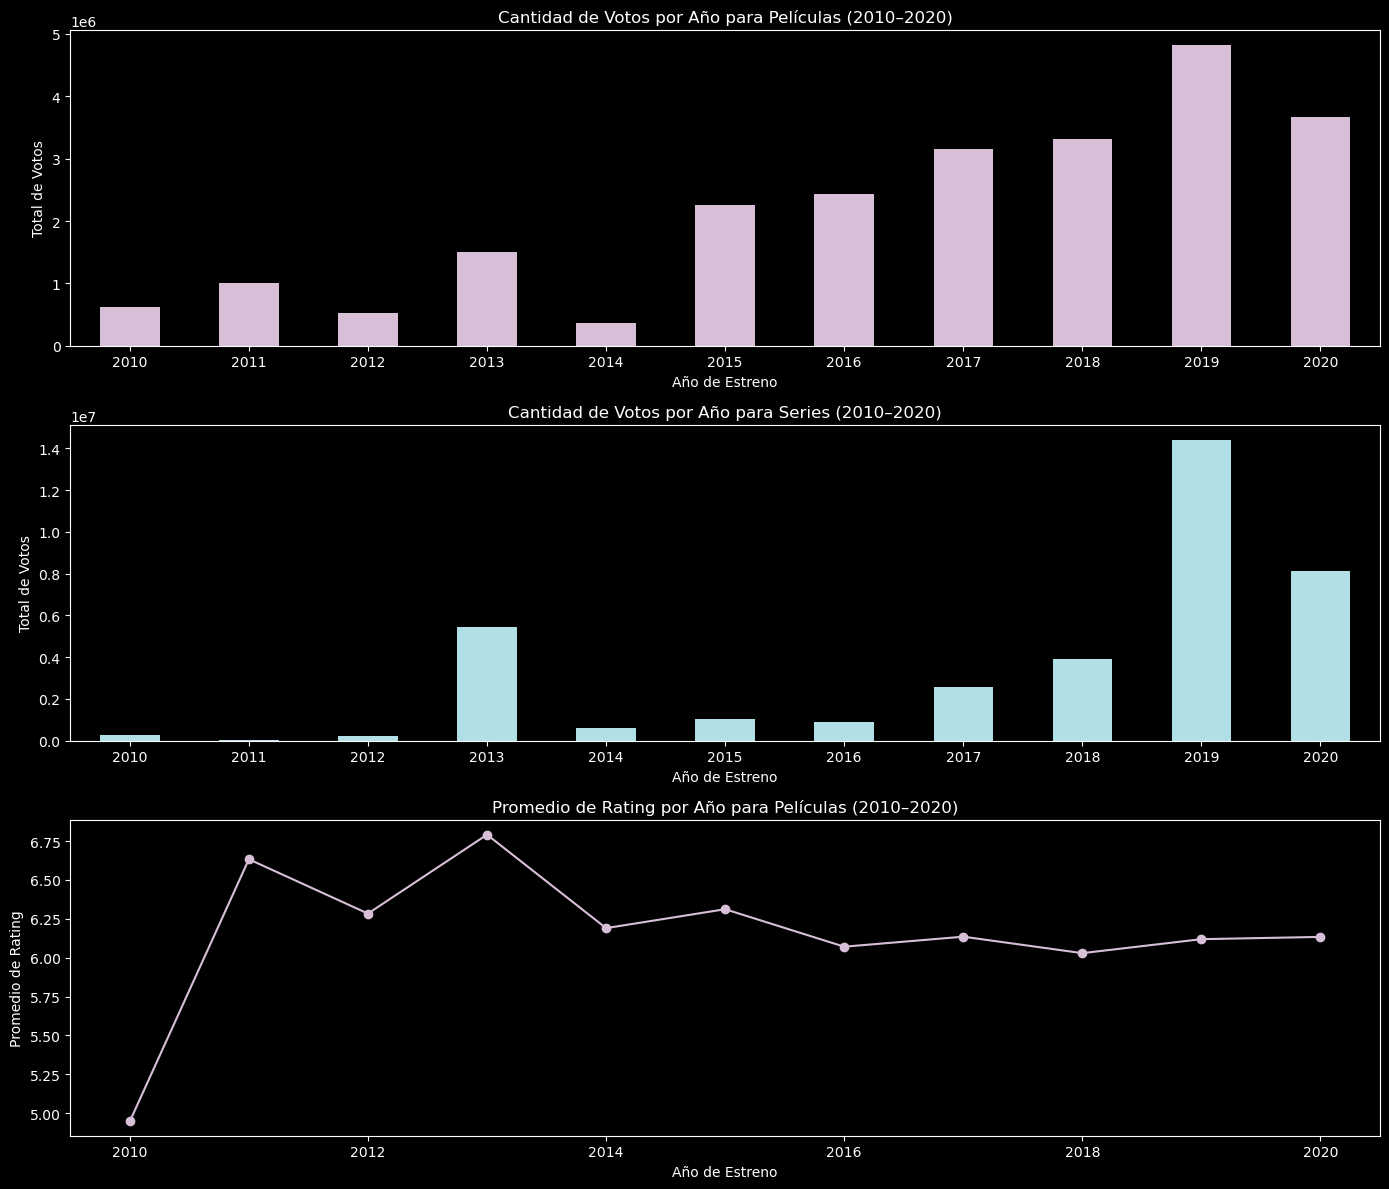

In [98]:
# Filtramos por tipo y año
peliculas = df_netflix_final[
    (df_netflix_final['type'] == 'Movie') & 
    (df_netflix_final['release_year'].between(2010, 2020))
]

series = df_netflix_final[
    (df_netflix_final['type'] == 'TV Show') & 
    (df_netflix_final['release_year'].between(2010, 2020))
]

# Creamos los subplots
plt.figure(figsize=(14, 12))

# Gráfico de películas: cantidad de votos por año
plt.subplot(3, 1, 1)
peliculas.groupby('release_year')['votes'].sum().plot(kind='bar', color='thistle')
plt.title('Cantidad de Votos por Año para Películas (2010–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Total de Votos')
plt.xticks(rotation=0)

# Gráfico de series: cantidad de votos por año
plt.subplot(3, 1, 2)
series.groupby('release_year')['votes'].sum().plot(kind='bar', color='powderblue')
plt.title('Cantidad de Votos por Año para Series (2010–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Total de Votos')
plt.xticks(rotation=0)

# Gráfico de películas: promedio de rating por año
plt.subplot(3, 1, 3)
peliculas.groupby('release_year')['rating'].mean().plot(kind='line', color='thistle', marker='o')
plt.title('Promedio de Rating por Año para Películas (2010–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Promedio de Rating')
plt.xticks(rotation=0)

# Ajuste de diseño
plt.tight_layout()
plt.show()

``Visualización top 10 países con mayor producción de películas y series``

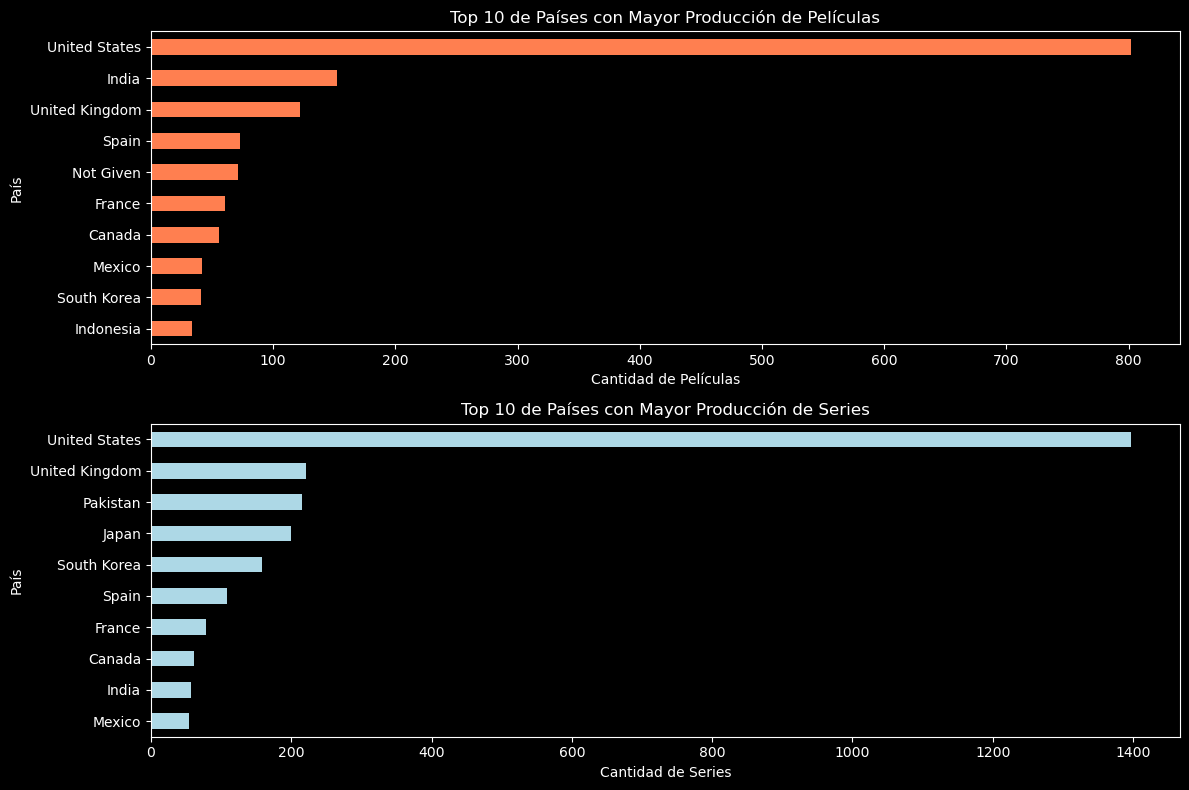

In [99]:
# Filtramos por tipo (película o serie) y luego contamos los títulos por país y tipo
top_peliculas = df_netflix_final[df_netflix_final['type'] == 'Movie']['country'].value_counts().sort_values(ascending=True).tail(10)
top_series = df_netflix_final[df_netflix_final['type'] == 'TV Show']['country'].value_counts().sort_values(ascending=True).tail(10)

# Creamos los gráficos
plt.figure(figsize=(12, 8))

# Gráfico de películas
plt.subplot(2, 1, 1)
top_peliculas.plot(kind='barh', color='coral')
plt.title('Top 10 de Países con Mayor Producción de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('País')

# Gráfico de series
plt.subplot(2, 1, 2)
top_series.plot(kind='barh', color='lightblue')
plt.title('Top 10 de Países con Mayor Producción de Series')
plt.xlabel('Cantidad de Series')
plt.ylabel('País')


plt.tight_layout()
plt.show()

``Visualización cantidad y duración de películas en catálogo``

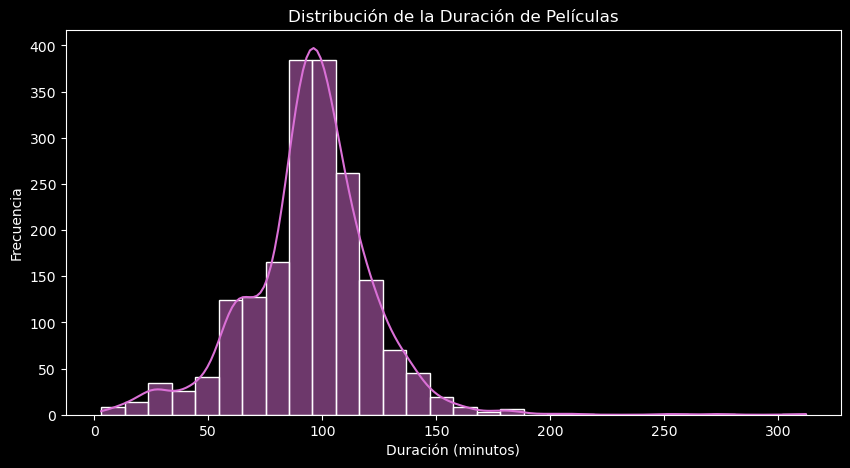

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(df_netflix_final[df_netflix_final['duration_min'] > 0]['duration_min'], bins=30, kde=True, color='orchid')
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

``Visualización cantidad de series por número de temporadas``

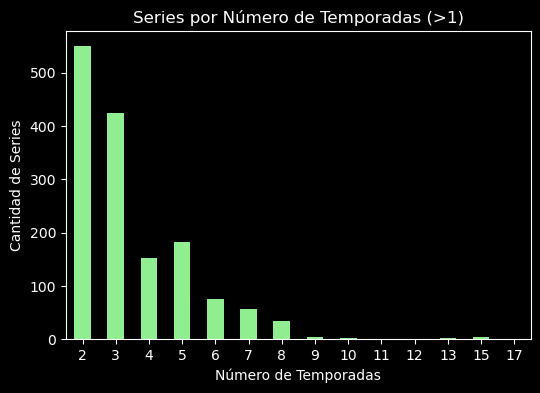

In [101]:
plt.figure(figsize=(6,4))
df_netflix_final[df_netflix_final['seasons'] > 1]['seasons'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Series por Número de Temporadas (>1)')
plt.xlabel('Número de Temporadas')
plt.ylabel('Cantidad de Series')
plt.xticks(rotation=0)
plt.show()

``Visualización top 10 géneros con más títulos en Netflix``

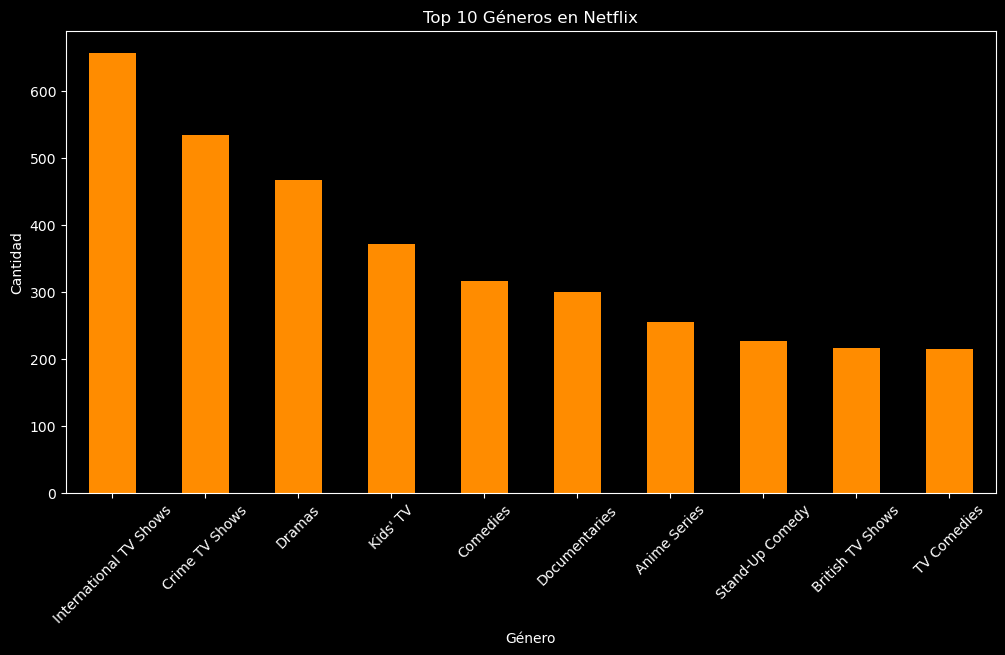

In [102]:
plt.figure(figsize=(12,6))
df_netflix_final['genre'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title('Top 10 Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

``Visualización Top 10 películas vs series por país``

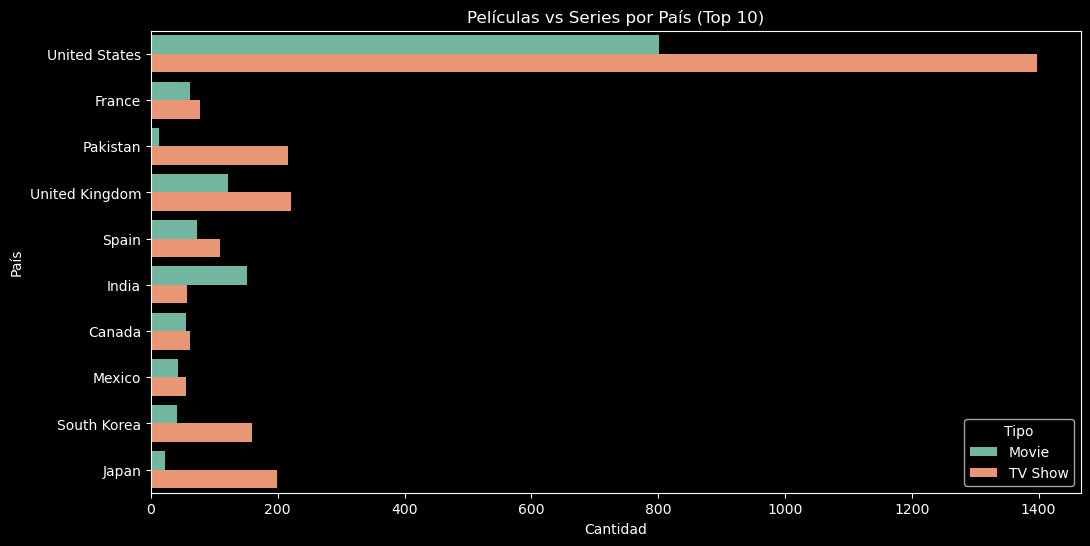

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=df_netflix_final[df_netflix_final['country'].notnull() & df_netflix_final['country'].isin(df_netflix_final['country'].value_counts().head(10).index)], palette='Set2')
plt.title('Películas vs Series por País (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()

``Matriz de correlación``

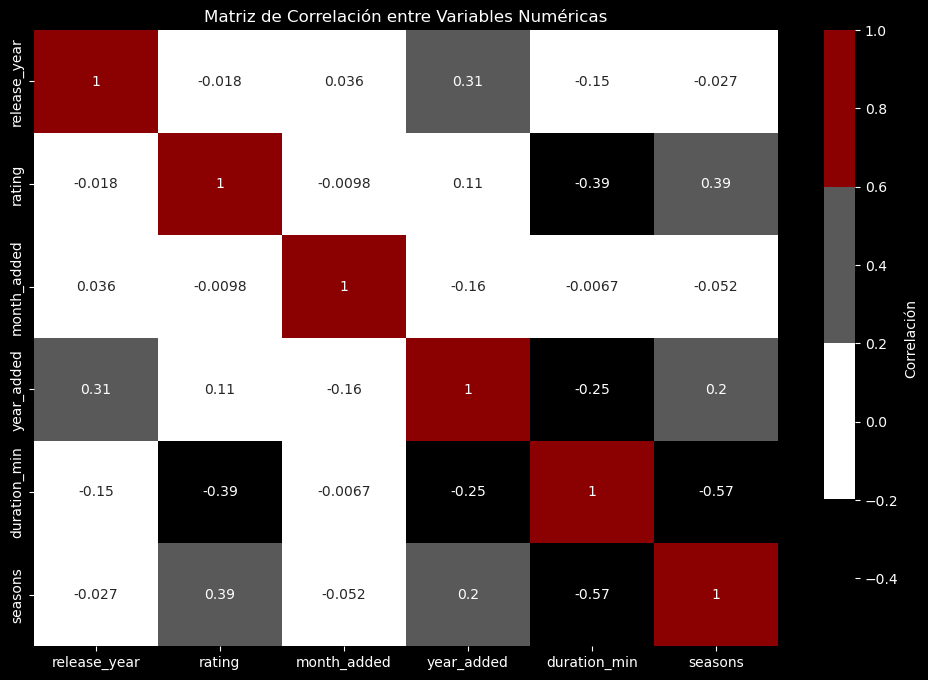

In [104]:
# Seleccionar variables numéricas relevantes
numeric_cols = ['release_year', 'rating', 'month_added',
                'year_added', 'duration_min', 'seasons']

# Paleta personalizada Netflix
netflix_palette = ['#E50914', '#000000', '#FFFFFF', '#595959', '#8B0000']

# Fondo negro
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
# Usando cmap de dos tonos básicos para que no choque, puedes personalizar más con 'coolwarm' o mapas discretos
sns.heatmap(df_netflix_final[numeric_cols].corr(),
            annot=True,
            cmap=sns.color_palette(netflix_palette, as_cmap=True),
            center=0,
            cbar_kws={'label': 'Correlación'})

plt.title('Matriz de Correlación entre Variables Numéricas', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()